In [3]:
import json
from solver.config import config
import numpy as np
import pandas as pd

with open('Dataset/exercise_concept.json', 'r') as f:
    exercise_concept = json.load(f)

with open('solver/model/model_exercise.json', 'r') as f:
    model_exercise = json.load(f)
oj_id = dict()
for key, value in model_exercise.items():
    oj_id[value] = key

with open('solver/model/model_concept.json', 'r') as f:
    model_concept = json.load(f)
concept_label = ['con']
for key, value in model_concept.items():
    concept_label.append(key)

concept_num = np.zeros(len(model_exercise) + 1, dtype=np.int8)

for i in range(1, config.exer_n):
    e = oj_id[i]
    concepts = exercise_concept[e]
    for con in concepts:
        concept_num[model_concept[con]] += 1

for i in range(1,len(concept_label)):
    print(i, concept_label[i], concept_num[i])
    

1 STL 3
2 big int 19
3 binary search 1
4 bitmasks 1
5 brute force 7
6 combinatorics 3
7 contruction 1
8 dfs 2
9 dp 18
10 dsu 1
11 gcd 1
12 graph 1
13 greedy 15
14 hash 1
15 implementation 56
16 math 25
17 matrix 2
18 parser 6
19 positional notation 27
20 prefix sum 4
21 recursion 7
22 sortings 29
23 stack 3
24 string 32
25 two pointer 1


/tmp/ipykernel_7999/1631362835.py:35: UserWarning: Glyph 38472 (\N{CJK UNIFIED IDEOGRAPH-9648}) missing from current font.
  plt.savefig(pic)
/tmp/ipykernel_7999/1631362835.py:35: UserWarning: Glyph 33298 (\N{CJK UNIFIED IDEOGRAPH-8212}) missing from current font.
  plt.savefig(pic)
/tmp/ipykernel_7999/1631362835.py:35: UserWarning: Glyph 28085 (\N{CJK UNIFIED IDEOGRAPH-6DB5}) missing from current font.
  plt.savefig(pic)
/tmp/ipykernel_7999/1631362835.py:35: UserWarning: Glyph 24352 (\N{CJK UNIFIED IDEOGRAPH-5F20}) missing from current font.
  plt.savefig(pic)
/tmp/ipykernel_7999/1631362835.py:35: UserWarning: Glyph 30002 (\N{CJK UNIFIED IDEOGRAPH-7532}) missing from current font.
  plt.savefig(pic)
/tmp/ipykernel_7999/1631362835.py:35: UserWarning: Glyph 20255 (\N{CJK UNIFIED IDEOGRAPH-4F1F}) missing from current font.
  plt.savefig(pic)
/tmp/ipykernel_7999/1631362835.py:35: UserWarning: Glyph 29677 (\N{CJK UNIFIED IDEOGRAPH-73ED}) missing from current font.
  plt.savefig(pic)
/tmp/i

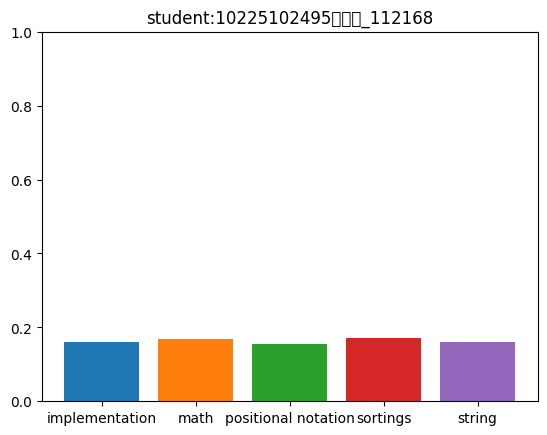

In [4]:

import matplotlib.pyplot as plt

path = 'c609_4_14'
# path = 'c609_4_22'

import os
if not os.path.exists('c609'):
    os.makedirs('c609')


with open(path + "_results.json",'r') as f:
    results = json.load(f)

# print(results.keys())

for stu_id, scores in results.items():
    abt = np.zeros(len(concept_label))
    for i, score in enumerate(scores, 1):       # i index exercise
        e = oj_id[i]
        concepts = exercise_concept[e]
        for con in concepts:
            c = model_concept[con]
            abt[c] += score

    for j in range(len(concept_label)):
        if concept_num[j] != 0:
            abt[j] /= concept_num[j]
    
    plt.clf()
    for i in [15, 16, 19, 22, 24]:
        plt.bar(concept_label[i], abt[i])
    plt.ylim(0,1)
    plt.title("student:"+stu_id)
    pic = os.path.join('c609', stu_id[:11] + '_' + path + ".jpg")
    plt.savefig(pic)